<a href="https://colab.research.google.com/github/jcandane/StochasticPhysics/blob/main/Mezzadri2006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

π = np.pi

def get_histogram(x, data, normalize=False):
    ### binary-search of sorted data for-all domains.
    ### let: N = len(data), then: O ~ (N + len(x))log(N)
    out = np.searchsorted( np.sort(data), x, side="right")
    if normalize:
        return x[1:] + (x[:-1] - x[1:])/2, (out[1:] - out[:-1])/len(data)
    return x[1:] + (x[:-1] - x[1:])/2, out[1:] - out[:-1]

In [ ]:
def wrong_distribution(n):
    """
    """
    Z   = (np.random.randn(n,n) + 1j*np.random.randn(n,n))/np.sqrt(2)
    Q,R = np.linalg.qr(Z)
    return Q

def wrong_distributionX(n, m=1):
    """
    """
    Z   = (np.random.randn(m, n, n) + 1j*np.random.randn(m, n, n))/np.sqrt(2)
    Q,R = np.linalg.qr(Z)
    return Q

In [ ]:
N    = 50 ### in U(N)
e, v = np.linalg.eig( wrong_distributionX(N, m=10000) )

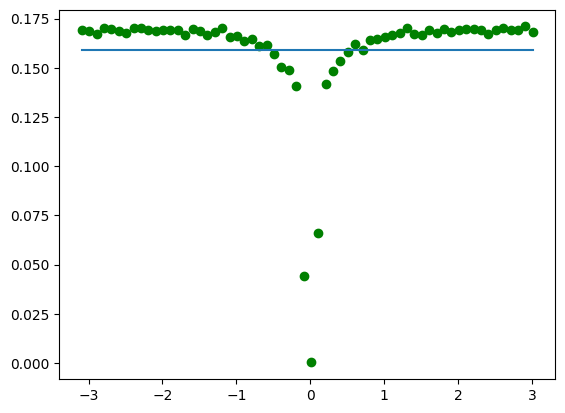

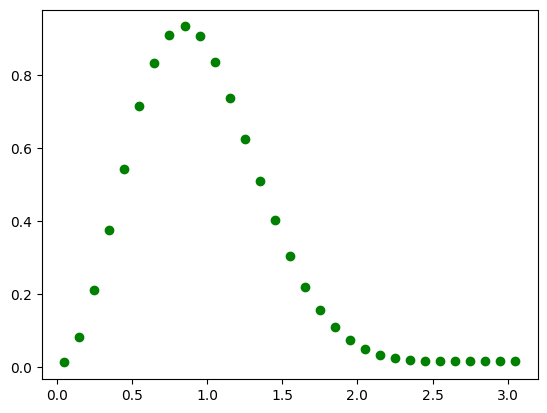

In [ ]:
dθ = 0.1

############### Plot Eigenvalue Density
bins, data = get_histogram(np.arange(-π,π, dθ), np.angle(e.reshape(-1)) )


plt.plot( bins , np.ones(len(bins))/(2*π) )
plt.scatter(  bins , data/e.size/dθ, label="A data", color="g")
plt.show()

############### Plot Eigenvalue Spacing
esorted    = np.sort( np.angle( e ) )
s          = ( N/(2*π) * ( esorted[:,1:] - esorted[:,:-1] ) )
bins, data = get_histogram(np.arange(0,π, dθ), s.reshape(-1) )


###!! plt.plot( bins , np.ones(len(bins))/(2*π) ) to get correct curve refer to Mehta 2004 Random Matrices page118, also look at https://arxiv.org/pdf/1510.04430.pdf
plt.scatter(  bins , data/e.size/dθ, label="A data", color="g")
plt.show()

## Haar

In [ ]:
def Haar_(n, m=1):
    """
    """
    Z   = (np.random.randn(m, n, n) + 1j*np.random.randn(m, n, n))/np.sqrt(2)
    Q,R = np.linalg.qr(Z)

    i = np.arange(n)
    d = R[:,i,i]
    ph = d/np.abs(d)
    return np.einsum("Iij, Ijk -> Iik", np.einsum("Iij, Ij -> Iij", Q, ph), Q)

In [ ]:
N    = 50 ### in U(N)
e, v = np.linalg.eig( Haar_(N, m=10000) )

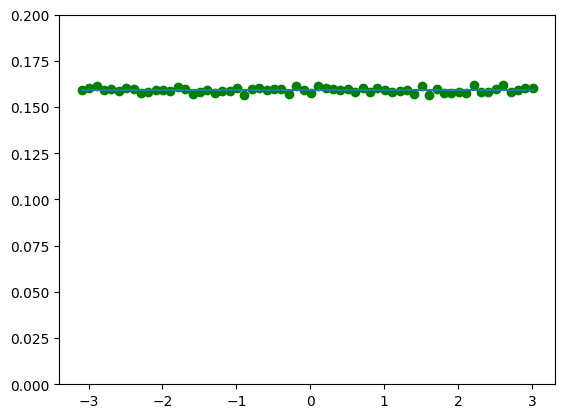

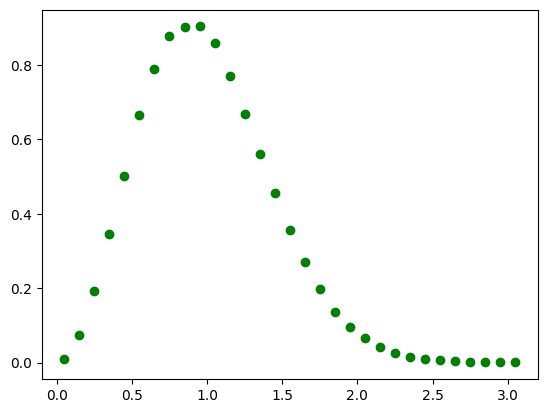

In [ ]:
dθ = 0.1

############### Plot Eigenvalue Density
bins, data = get_histogram(np.arange(-π,π, dθ), np.angle(e.reshape(-1)) )


plt.plot( bins , np.ones(len(bins))/(2*π) )
plt.scatter(  bins , data/e.size/dθ, label="A data", color="g")
plt.ylim(0,0.2)
plt.show()

############### Plot Eigenvalue Spacing
esorted    = np.sort( np.angle( e ) )
s          = ( N/(2*π) * ( esorted[:,1:] - esorted[:,:-1] ) )
bins, data = get_histogram(np.arange(0,π, dθ), s.reshape(-1) )


###!! plt.plot( bins , np.ones(len(bins))/(2*π) ) to get correct curve refer to Mehta 2004 Random Matrices page118, also look at https://arxiv.org/pdf/1510.04430.pdf
plt.scatter(  bins , data/e.size/dθ, label="A data", color="g")
plt.show()